In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [9]:
wine = load_wine()
X, y = wine.data, wine.target
class_names = wine.target_names

In [20]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

df['target'] = wine.target
df.tail(20)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.000000,0.57,1.96,660.0,2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.750000,0.57,1.78,620.0,2
160,12.36,3.83,2.38,21.0,88.0,2.30,0.92,0.50,1.04,7.650000,0.56,1.58,520.0,2
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.880000,0.96,1.82,680.0,2
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.580000,0.87,2.11,570.0,2
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.280000,0.68,1.75,675.0,2
164,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.580000,0.70,1.68,615.0,2
165,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.620000,0.78,1.75,520.0,2
166,13.45,3.70,2.60,23.0,111.0,1.70,0.92,0.43,1.46,10.680000,0.85,1.56,695.0,2
167,12.82,3.37,2.30,19.5,88.0,1.48,0.66,0.40,0.97,10.260000,0.72,1.75,685.0,2


In [21]:
# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Separar treino e teste

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

### Algoritmos de Classificação

In [23]:
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=200),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf'),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

### Avaliação por modelo


 Regressão Logística
Acurácia : 0.98
Precisão : 0.98
Recall   : 0.98
F1-Score : 0.98


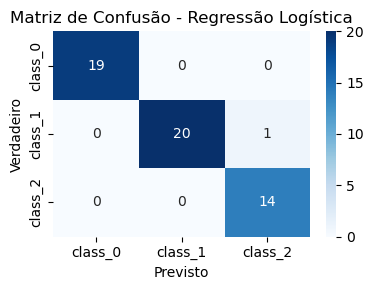


 Árvore de Decisão
Acurácia : 0.96
Precisão : 0.97
Recall   : 0.96
F1-Score : 0.96


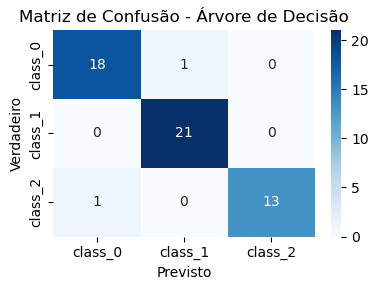


 Random Forest
Acurácia : 1.00
Precisão : 1.00
Recall   : 1.00
F1-Score : 1.00


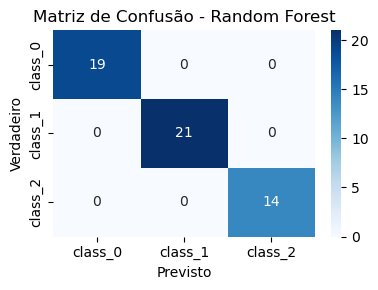


 SVM
Acurácia : 0.98
Precisão : 0.98
Recall   : 0.98
F1-Score : 0.98


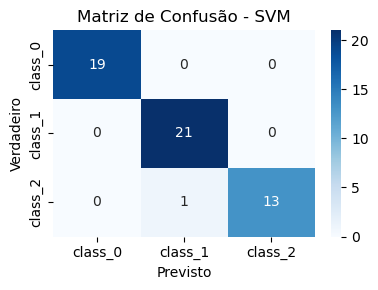


 K-NN
Acurácia : 0.96
Precisão : 0.96
Recall   : 0.97
F1-Score : 0.96


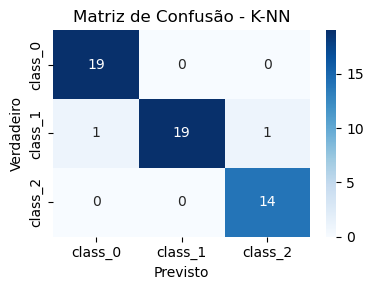

In [24]:
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n {nome}")
    print(f"Acurácia : {acc:.2f}")
    print(f"Precisão : {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-Score : {f1:.2f}")

    # Matriz de confusão
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()